In [47]:
import os
from pathlib import Path
from typing import Literal
from matplotlib import pyplot as plt
import polars as pl

from pandera.polars import DataFrameSchema
from pandera.typing.polars import DataFrame
import seaborn as sns

# current directory をリポジトリルートに固定
os.chdir("/Users/masato.morita/src/recommender-experiments/")

# グラフに日本語を表示するために、日本語対応のフォントを設定 (例: IPAexゴシック)
plt.rcParams["font.family"] = "IPAexGothic"
print(plt.rcParams["font.family"])
import japanize_matplotlib

# 結果ファイルのパス
SIMURATION_RESULTS_OPE = Path("logs/logging_policy_experiment/ope_result.csv")
SIMURATION_RESULTS_OPL = Path("logs/logging_policy_experiment/opl_result.csv")


class OPEResult(DataFrameSchema):
    logging_policy_name: str
    n_rounds: int
    target_policy_true_value: float
    naive_estimate: float
    naive_error: float
    ips_estimate: float
    ips_error: float


class OPLResult(DataFrameSchema):
    logging_policy_name: str
    n_rounds: int
    trained_policy_true_value: float


POLICY_NAME_MAP = {
    "pi_1": "パーソナライズ無し & 決定的(全ユーザに1つのアイテムを推薦)",
    "pi_2": "パーソナライズ無し & 確率的(ただし全アイテムは選ばれ得ない)",
    "pi_3": "パーソナライズ無し & 確率的(ε-greedy)",
    "pi_4": "パーソナライズ有り & 決定的",
    "pi_5": "パーソナライズ有り & 確率的(ε-greedy)",
}
COLOR_MAP = {
    "pi_1": "black",
    "pi_2": "blue",
    "pi_3": "orange",
    "pi_4": "green",
    "pi_5": "red",
}

['IPAexGothic']


In [38]:
ope_result_df = pl.read_csv(SIMURATION_RESULTS_OPE)
opl_result_df = pl.read_csv(SIMURATION_RESULTS_OPL)

print(ope_result_df)
print(opl_result_df)

shape: (495, 7)
┌───────────────┬──────────┬───────────────┬──────────────┬─────────────┬──────────────┬───────────┐
│ logging_polic ┆ n_rounds ┆ target_policy ┆ naive_estima ┆ naive_error ┆ ips_estimate ┆ ips_error │
│ y_name        ┆ ---      ┆ _true_value   ┆ te           ┆ ---         ┆ ---          ┆ ---       │
│ ---           ┆ i64      ┆ ---           ┆ ---          ┆ f64         ┆ f64          ┆ f64       │
│ str           ┆          ┆ f64           ┆ f64          ┆             ┆              ┆           │
╞═══════════════╪══════════╪═══════════════╪══════════════╪═════════════╪══════════════╪═══════════╡
│ pi_1          ┆ 50       ┆ 0.316         ┆ 0.0833       ┆ 0.2327      ┆ 0.02         ┆ 0.296     │
│ pi_1          ┆ 100      ┆ 0.308         ┆ 0.375        ┆ -0.067      ┆ 0.12         ┆ 0.188     │
│ pi_1          ┆ 150      ┆ 0.312667      ┆ 0.2075       ┆ 0.1051      ┆ 0.0733       ┆ 0.2393    │
│ pi_1          ┆ 200      ┆ 0.313         ┆ 0.3462       ┆ -0.0332     ┆ 0

[<matplotlib.lines.Line2D object at 0x30b009840>, <matplotlib.lines.Line2D object at 0x30b0097b0>, <matplotlib.lines.Line2D object at 0x30b009090>, <matplotlib.lines.Line2D object at 0x30b009bd0>, <matplotlib.lines.Line2D object at 0x30b008e50>] ['pi_1', 'pi_2', 'pi_3', 'pi_4', 'pi_5']


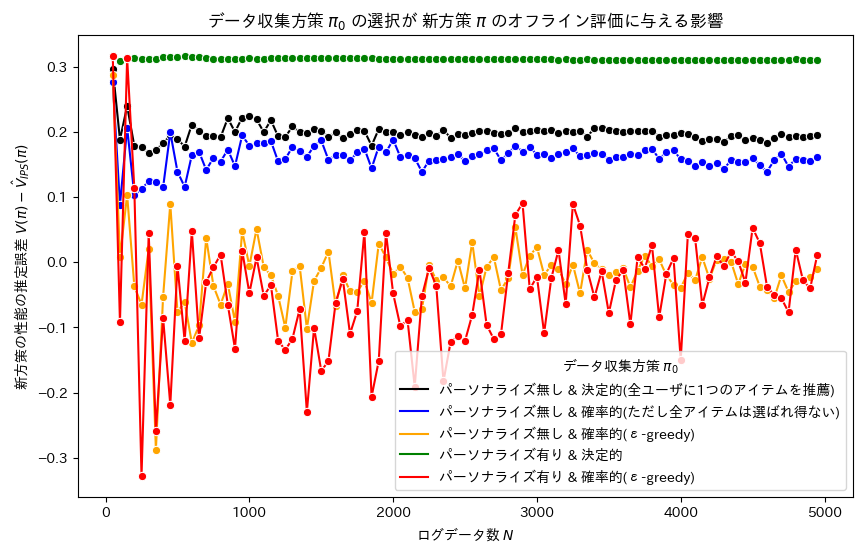

In [48]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=ope_result_df.to_pandas(),
    x="n_rounds",
    y="ips_error",
    hue="logging_policy_name",
    marker="o",
    palette=COLOR_MAP,
)
plt.xlabel(r"ログデータ数 $N$")
plt.ylabel(r"新方策の性能の推定誤差 $V(\pi) - \hat{V}_{IPS}(\pi)$")
# plt.title("Performance of OPE accuracy by logging policy and n_rounds")
plt.title(
    r"データ収集方策 $\pi_{0}$ の選択が 新方策 $\pi$ のオフライン評価に与える影響"
)
# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
plt.legend(
    handles,
    [POLICY_NAME_MAP[label] for label in labels],
    title=r"データ収集方策 $\pi_{0}$",
)
plt.show()

[<matplotlib.lines.Line2D object at 0x32c1a4d60>, <matplotlib.lines.Line2D object at 0x32c1a50f0>, <matplotlib.lines.Line2D object at 0x32c1a5480>, <matplotlib.lines.Line2D object at 0x32c1a5810>] ['pi_2', 'pi_3', 'pi_4', 'pi_5']


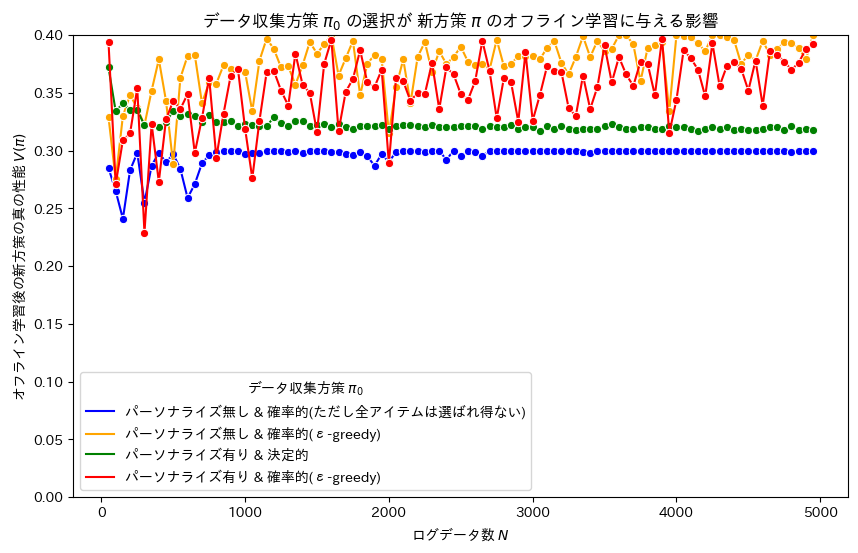

In [49]:
# グラフの描画
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=opl_result_df.to_pandas(),
    x="n_rounds",
    y="trained_policy_true_value",
    hue="logging_policy_name",
    marker="o",
    palette=COLOR_MAP,
)
# plt.xscale("log")
plt.xlabel(r"ログデータ数 $N$")
plt.ylabel(r"オフライン学習後の新方策の真の性能 $V(\pi)$")
plt.ylim(0.0, 0.4)
plt.title(
    r"データ収集方策 $\pi_{0}$ の選択が 新方策 $\pi$ のオフライン学習に与える影響"
)

# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
plt.legend(
    handles,
    [POLICY_NAME_MAP[label] for label in labels],
    title=r"データ収集方策 $\pi_{0}$",
)

plt.show()